# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [123]:
# Set the API base URL
url = 'http://api.openweathermap.org/geo/1.0/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'direct?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_info = requests.get(city_url).json()
        lat = city_info[0]['lat']
        lon = city_info[0]['lon']
        city_weather = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid={weather_api_key}').json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.gmtime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": time.asctime(city_date)})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bom jesus
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | asau village
City not found. Skipping...
Processing Record 9 of Set 1 | mumford
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | al ghayzah
Processing Record 12 of Set 1 | el granada
Processing Record 13 of Set 1 | bonny
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | itoman
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | gotsucho
Processing Record 22 of Set 1 | port-aux-fra

Processing Record 32 of Set 4 | arkhipo-osipovka
Processing Record 33 of Set 4 | sawakin
Processing Record 34 of Set 4 | sitarganj
Processing Record 35 of Set 4 | carnot
Processing Record 36 of Set 4 | ahar
Processing Record 37 of Set 4 | kudahuvadhoo
Processing Record 38 of Set 4 | vorkuta
Processing Record 39 of Set 4 | iskateley
Processing Record 40 of Set 4 | susuman
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | cheyyur
City not found. Skipping...
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | saipan
Processing Record 45 of Set 4 | mata-utu
Processing Record 46 of Set 4 | colonia
Processing Record 47 of Set 4 | garoowe
Processing Record 48 of Set 4 | carbonear
Processing Record 49 of Set 4 | mil'kovo
Processing Record 0 of Set 5 | timimoun
Processing Record 1 of Set 5 | santa vitoria
Processing Record 2 of Set 5 | kill devil hills
Processing Record 3 of Set 5 | tolanaro
Processing Record 4 of Set 5 | vohipaho
Processing Record

Processing Record 23 of Set 8 | makawao
Processing Record 24 of Set 8 | prince albert
Processing Record 25 of Set 8 | sidi salim
Processing Record 26 of Set 8 | whakatane
Processing Record 27 of Set 8 | vernon
Processing Record 28 of Set 8 | amungan
Processing Record 29 of Set 8 | castillos
Processing Record 30 of Set 8 | sao vicente
Processing Record 31 of Set 8 | guerrero negro
Processing Record 32 of Set 8 | santo domingo de la calzada
Processing Record 33 of Set 8 | boca suno
City not found. Skipping...
Processing Record 34 of Set 8 | camarinas
Processing Record 35 of Set 8 | valparaiso
Processing Record 36 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 37 of Set 8 | amos
Processing Record 38 of Set 8 | araraquara
Processing Record 39 of Set 8 | tokushima
Processing Record 40 of Set 8 | puerto armuelles
Processing Record 41 of Set 8 | waingapu
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | vila franca do campo
Processing Record 44 o

Processing Record 10 of Set 12 | bubaque
Processing Record 11 of Set 12 | hami
Processing Record 12 of Set 12 | jiangzi
Processing Record 13 of Set 12 | istgah-e rah ahan-e garmsar
City not found. Skipping...
Processing Record 14 of Set 12 | portland
Processing Record 15 of Set 12 | kozle
Processing Record 16 of Set 12 | inhambane
Processing Record 17 of Set 12 | goes
Processing Record 18 of Set 12 | sisimiut
Processing Record 19 of Set 12 | half moon bay
Processing Record 20 of Set 12 | khvoynaya
Processing Record 21 of Set 12 | sandnessjoen
Processing Record 22 of Set 12 | byalynichy
Processing Record 23 of Set 12 | celestun
Processing Record 24 of Set 12 | penticton
Processing Record 25 of Set 12 | fortuna
Processing Record 26 of Set 12 | nagai
Processing Record 27 of Set 12 | tulsipur
Processing Record 28 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 29 of Set 12 | jambi city
City not found. Skipping...
Processing Record 30 of Set 12 | chaman
Processing Recor

In [124]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [125]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bom jesus,-28.6693,-50.4347,21.05,58,7,2.16,BR,Fri Aug 4 18:36:07 2023
1,saint-pierre,48.3833,7.4719,19.05,86,86,0.73,FR,Fri Aug 4 18:36:08 2023
2,whitehorse,60.7216,-135.0549,18.43,59,20,3.09,CA,Fri Aug 4 18:36:08 2023
3,blackmans bay,-43.0047,147.3180,11.03,68,100,6.11,AU,Fri Aug 4 18:36:10 2023
4,puerto natales,-51.7262,-72.5060,4.53,73,86,8.00,CL,Fri Aug 4 18:36:12 2023


In [126]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [127]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bom jesus,-28.6693,-50.4347,21.05,58,7,2.16,BR,Fri Aug 4 18:36:07 2023
1,saint-pierre,48.3833,7.4719,19.05,86,86,0.73,FR,Fri Aug 4 18:36:08 2023
2,whitehorse,60.7216,-135.0549,18.43,59,20,3.09,CA,Fri Aug 4 18:36:08 2023
3,blackmans bay,-43.0047,147.3180,11.03,68,100,6.11,AU,Fri Aug 4 18:36:10 2023
4,puerto natales,-51.7262,-72.5060,4.53,73,86,8.00,CL,Fri Aug 4 18:36:12 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

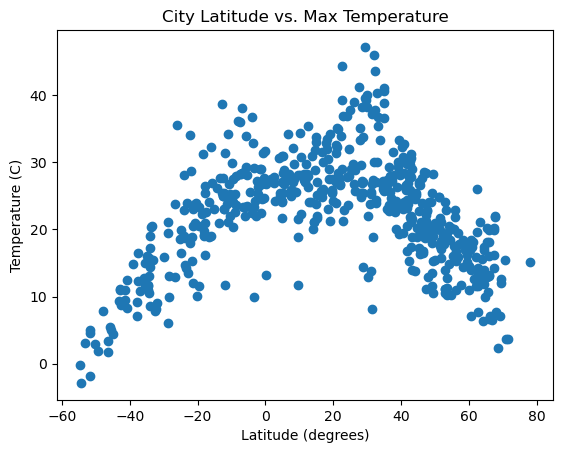

In [128]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

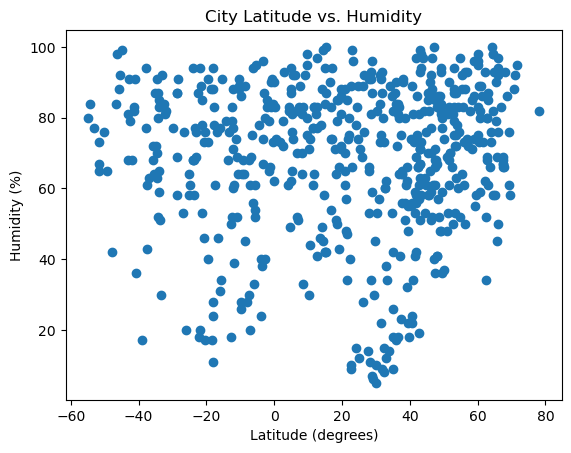

In [129]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

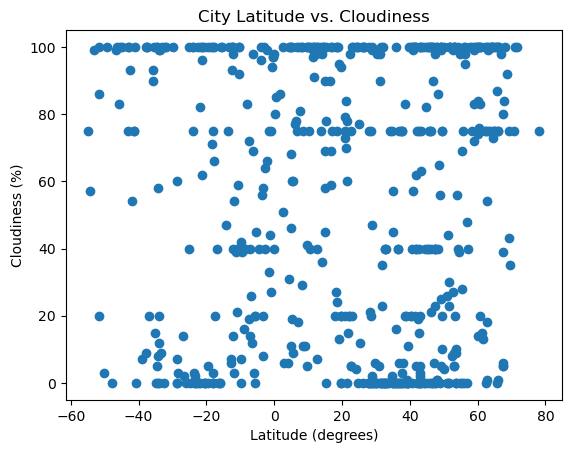

In [130]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

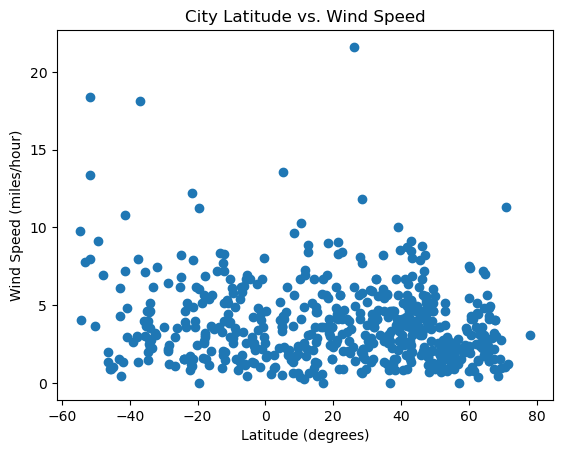

In [131]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (miles/hour)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [132]:
# Define a function to create Linear Regression plots
def linregressplot(x,y):
    slope, yint, r, p, std_err = linregress(x,y)
    line = slope*x+yint
    
    plt.scatter(x,y)
    plt.plot(x,line,color='r')
    plt.text(x.median(),y=y.median(),s=f'y = {round(slope,2)}x + {round(yint,2)}',color='r')
    plt.title(f'{x.name} vs {y.name}')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.show()
    
    print(f'The correlation between {x.name} and {y.name} is r = {r}')

In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-pierre,48.3833,7.4719,19.05,86,86,0.73,FR,Fri Aug 4 18:36:08 2023
2,whitehorse,60.7216,-135.0549,18.43,59,20,3.09,CA,Fri Aug 4 18:36:08 2023
5,udachny,66.4118,112.2517,7.11,93,100,4.92,RU,Fri Aug 4 18:36:12 2023
7,mumford,42.9924,-77.8603,27.87,67,0,5.31,US,Fri Aug 4 18:36:14 2023
9,al ghayzah,13.5591,44.0257,24.04,46,100,3.15,YE,Fri Aug 4 18:36:15 2023


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bom jesus,-28.6693,-50.4347,21.05,58,7,2.16,BR,Fri Aug 4 18:36:07 2023
3,blackmans bay,-43.0047,147.3180,11.03,68,100,6.11,AU,Fri Aug 4 18:36:10 2023
4,puerto natales,-51.7262,-72.5060,4.53,73,86,8.00,CL,Fri Aug 4 18:36:12 2023
6,waitangi,-35.2705,174.0805,11.42,87,15,3.67,NZ,Fri Aug 4 18:36:13 2023
8,grytviken,-54.2806,-36.5098,-2.87,84,57,4.04,GS,Fri Aug 4 18:36:14 2023


###  Temperature vs. Latitude Linear Regression Plot

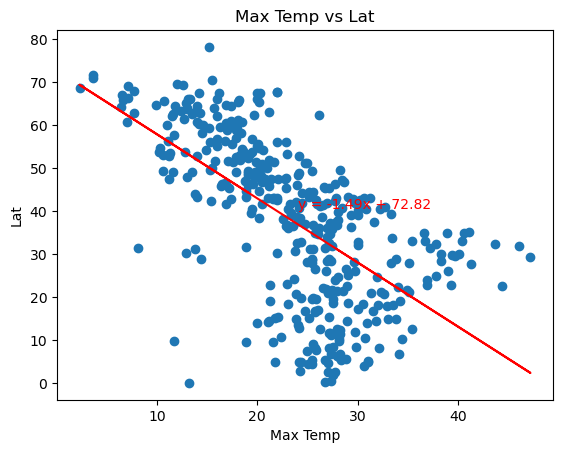

The correlation between Max Temp and Lat is r = -0.6197646128805233


In [135]:
# Linear regression on Northern Hemisphere
linregressplot(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])

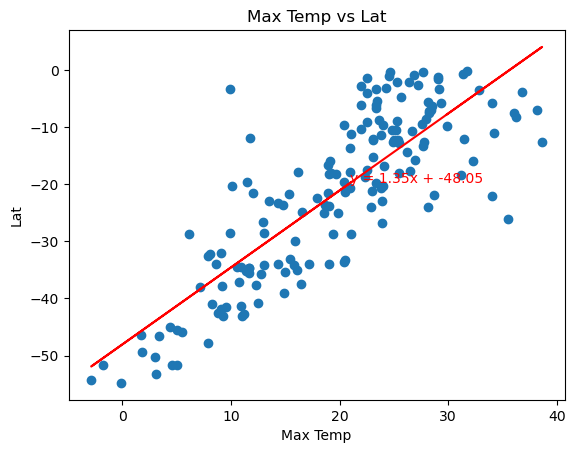

The correlation between Max Temp and Lat is r = 0.8258391349110823


In [136]:
# Linear regression on Southern Hemisphere
linregressplot(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is a moderate negative correlation between temperature and latitude in the Northern Hemisphere, while there is a very strong positive correlation between the same parameters in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

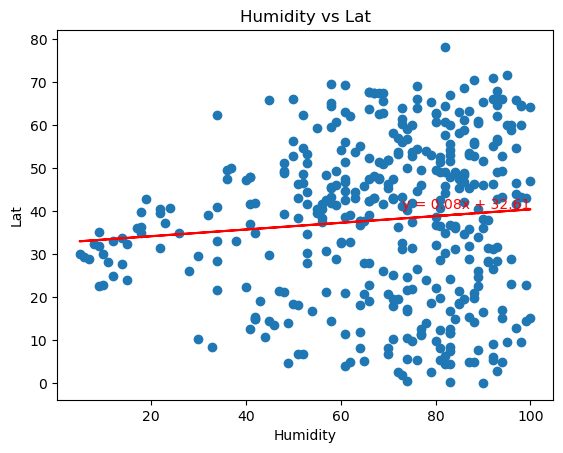

The correlation between Humidity and Lat is r = 0.09217833834054534


In [137]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Humidity'],northern_hemi_df['Lat'])

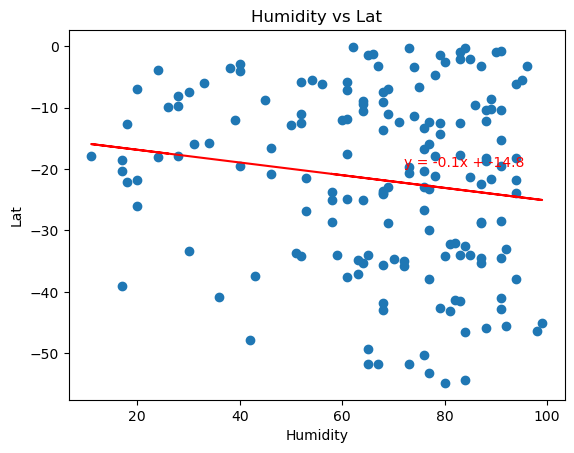

The correlation between Humidity and Lat is r = -0.15270856293452617


In [138]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Humidity'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets.

### Cloudiness vs. Latitude Linear Regression Plot

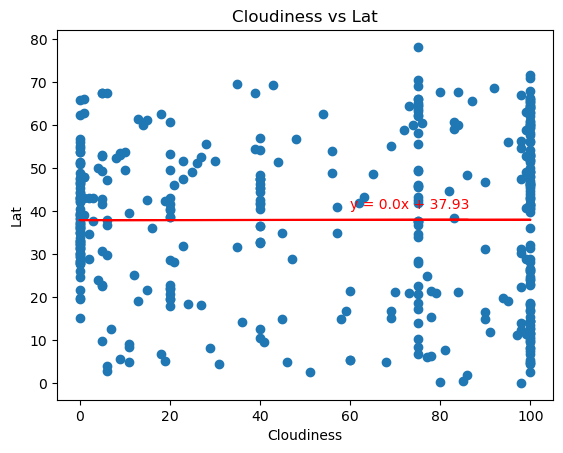

The correlation between Cloudiness and Lat is r = 0.0017529432687547382


In [139]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'])

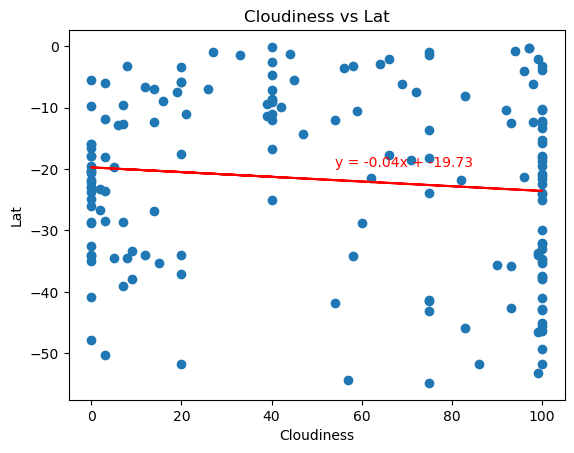

The correlation between Cloudiness and Lat is r = -0.10637435088175388


In [140]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets.

### Wind Speed vs. Latitude Linear Regression Plot

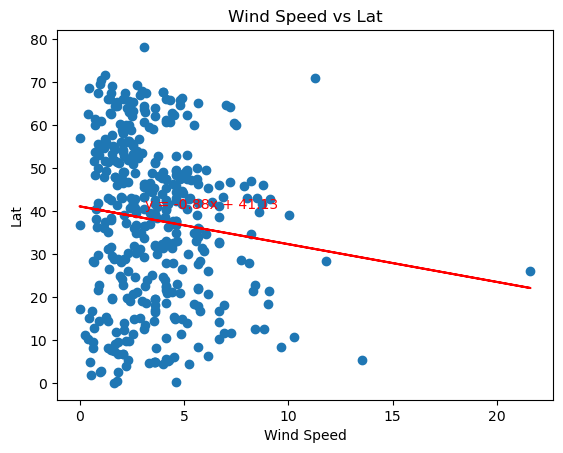

The correlation between Wind Speed and Lat is r = -0.11176961853061153


In [141]:
# Northern Hemisphere
linregressplot(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'])

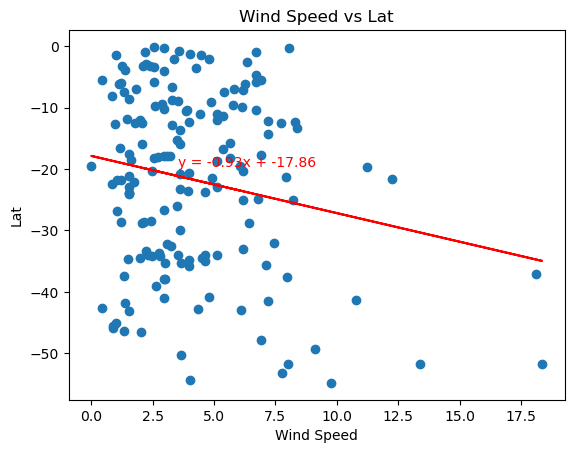

The correlation between Wind Speed and Lat is r = -0.18857501772570634


In [142]:
# Southern Hemisphere
linregressplot(southern_hemi_df['Wind Speed'],southern_hemi_df['Lat'])

**Discussion about the linear relationship:** There is no correlation in these datasets.